In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

moviedf1 = pd.read_csv("C:/Users/User/indo-movie-portofolio/indonesian_movies.csv")
moviedf1.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [2]:
moviedf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


In [3]:
moviedf2 = moviedf1.drop(columns=['runtime','votes','languages'])
moviedf2.isna().sum()

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
directors         7
actors            0
dtype: int64

In [4]:
moviedf3 = moviedf2.fillna({'rating':'unrated','directors':'unnamed','description':'unnamed'})
moviedf3.isna().sum()

title            0
year             0
description      0
genre           36
rating           0
users_rating     0
directors        0
actors           0
dtype: int64

In [5]:
moviedfclear = moviedf3.dropna(subset=['genre'])
moviedfclear.isna().sum()

title           0
year            0
description     0
genre           0
rating          0
users_rating    0
directors       0
actors          0
dtype: int64

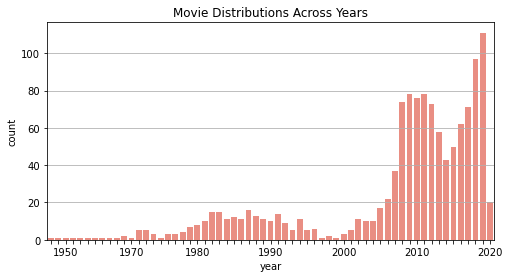

In [6]:
f, ax = plt.subplots(figsize=(8, 4))
plt.title("Movie Distributions Across Years")
plt.grid(True)
sns.countplot(x="year", data=moviedfclear, color="salmon")

for label in ax.get_xticklabels():
    if np.int64(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

In [7]:
print(moviedfclear['genre'].unique())

['Biography' 'Thriller' 'Horror' 'Adventure' 'Drama' 'Comedy' 'Animation'
 'Action' 'History' 'Crime' 'Romance' 'Sci-Fi' 'Family' 'War' 'Fantasy']


In [8]:
moviedfclear["genre"].value_counts().to_frame().rename(columns={"genre": "Jumlah Film"})

,Jumlah Film
Drama,456
Comedy,287
Horror,231
Action,132
Adventure,49
Biography,28
Thriller,12
Romance,11
Fantasy,10
Crime,9


Text(0.5, 0, 'Quantity')

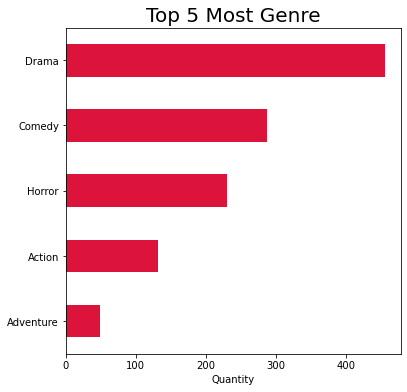

In [9]:
TopGenres = moviedfclear["genre"].value_counts().head().plot.barh(figsize=(6,6), color='crimson').invert_yaxis()
plt.title("Top 5 Most Genre", fontsize=20)
plt.ylabel(None)
plt.xlabel("Quantity")

Text(0.5, 1.0, 'Percentage Top 5 Most Genre')

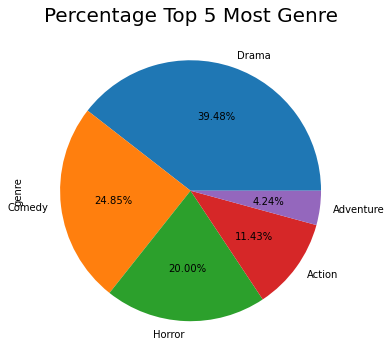

In [10]:
TopGenres = moviedfclear["genre"].value_counts().head().plot.pie(figsize=(6,6), autopct = "%0.2f%%")
plt.title("Percentage Top 5 Most Genre", fontsize=20)

In [11]:
bestmovie = moviedfclear.loc[:, ['title', 'users_rating']].sort_values(by=['users_rating'], ascending=False)
bestmovie.head()

,title,users_rating
52,Horas Amang: Tiga Bulan Untuk Selamanya,9.4
496,Salisiah Adaik,9.2
3,Anak Garuda,9.1
172,Jelita Sejuba: Mencintai Kesatria Negara,9.1
408,Turis Romantis,8.9


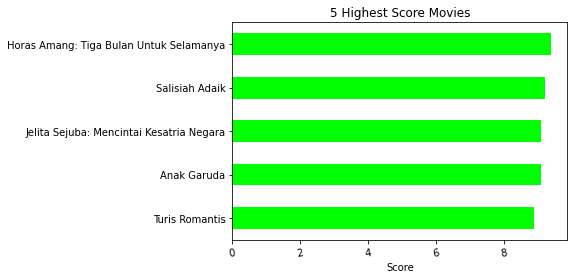

In [12]:
best_movies = moviedfclear.groupby('title')['users_rating'].mean()
best_movies.sort_values(ascending=False).head().plot.barh(color='lime').invert_yaxis()
plt.xticks(rotation=10)
plt.title("5 Highest Score Movies")
plt.ylabel(None)
plt.xlabel("Score")
plt.show()

In [13]:
moviedfclear["directors"].value_counts().to_frame().rename(columns={"directors": "Jumlah Proyek"}).head()

,Jumlah Proyek
Nayato Fio Nuala,60
Rizal Mantovani,34
Hanung Bramantyo,30
Sisworo Gautama Putra,23
Arizal,23


Text(0.5, 0, 'Amount of Projects')

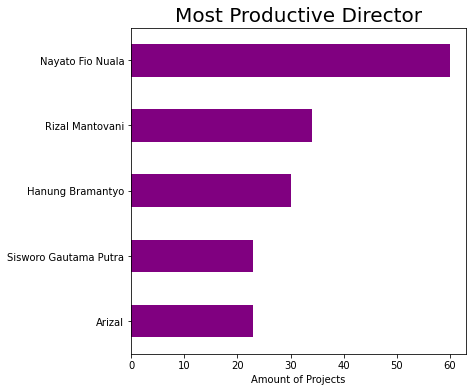

In [14]:
MostProductiveDirectors = moviedfclear["directors"].value_counts().head().plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title("Most Productive Director", fontsize=20)
plt.ylabel(None)
plt.xlabel("Amount of Projects")

Text(0.5, 1.0, 'What Genre that Nayato Direct Most?')

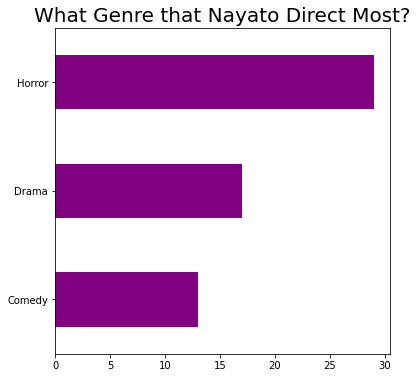

In [15]:
nayato = moviedfclear['directors'] =='Nayato Fio Nuala'
moviedfclear.loc[nayato]['genre'].value_counts().head(3).plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title('What Genre that Nayato Direct Most?', fontsize = 20)

Text(0.5, 1.0, 'What Genre that Rizal Direct Most?')

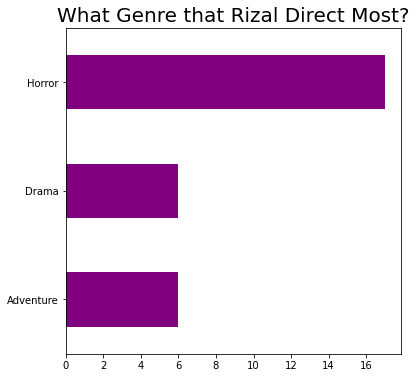

In [16]:
rizal = moviedfclear['directors'] =='Rizal Mantovani'
moviedfclear.loc[rizal]['genre'].value_counts().head(3).plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title('What Genre that Rizal Direct Most?', fontsize = 20)

Text(0.5, 1.0, 'What Genre that Hanung Direct Most?')

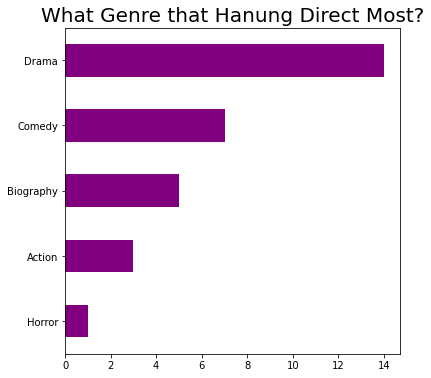

In [17]:
hanung = moviedfclear['directors'] =='Hanung Bramantyo'
moviedfclear.loc[hanung]['genre'].value_counts().head().plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title('What Genre that Hanung Direct Most?', fontsize = 20)

Text(0.5, 1.0, 'What Genre that Arizal Direct Most?')

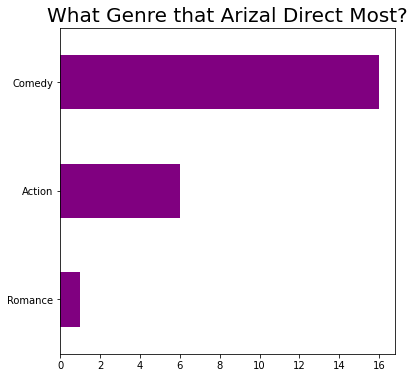

In [18]:
arizal = moviedfclear['directors'] =='Arizal'
moviedfclear.loc[arizal]['genre'].value_counts().head(3).plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title('What Genre that Arizal Direct Most?', fontsize = 20)

Text(0.5, 1.0, 'What Genre that Monty Direct Most?')

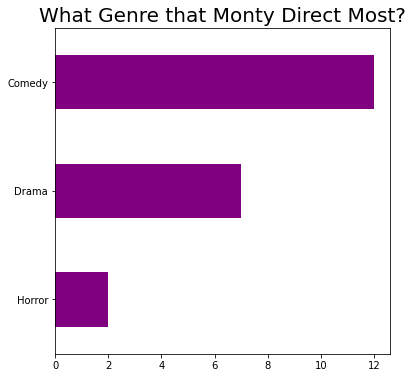

In [19]:
monty = moviedfclear['directors'] =='Monty Tiwa'
moviedfclear.loc[monty]['genre'].value_counts().head(3).plot.barh(figsize=(6,6), color='purple').invert_yaxis()
plt.title('What Genre that Monty Direct Most?', fontsize = 20)

In [20]:
moviedfclear['actors'] = moviedfclear['actors'].str.replace(r'[\[\]\'\"]','')
moviedfclear['actors'] = moviedfclear['actors'].str.replace(', ',',')

daftaractor = {}
for actors in moviedfclear['actors'].values:
    actors = list(actors.split(","))
    for actor in actors:
        if actor in daftaractor.keys():
            daftaractor[actor] = daftaractor[actor] + 1
        else:
            daftaractor[actor] = 1

df_actor = pd.DataFrame.from_dict(daftaractor,orient='index',columns=['Projek Film'])
df_actor.dropna()

MostProductiveActors = df_actor.sort_values(by='Projek Film',ascending=False)[1:6]
MostProductiveActors

C:\Users\User\AppData\Local\Temp\ipykernel_21508\4180330229.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  moviedfclear['actors'] = moviedfclear['actors'].str.replace(r'[\[\]\'\"]','')
C:\Users\User\AppData\Local\Temp\ipykernel_21508\4180330229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedfclear['actors'] = moviedfclear['actors'].str.replace(r'[\[\]\'\"]','')
C:\Users\User\AppData\Local\Temp\ipykernel_21508\4180330229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,Projek Film
Lukman Sardi,57
Reza Rahadian,47
Verdi Solaiman,45
Jajang C. Noer,45
Tio Pakusadewo,40


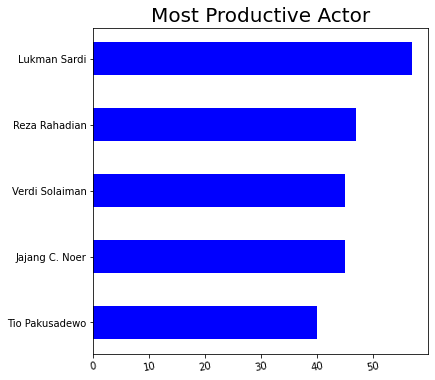

In [21]:
fig, ax = plt.subplots(figsize = (6,6))
ax.barh(MostProductiveActors.index, MostProductiveActors["Projek Film"], color='blue', height = 0.5)
ax.invert_yaxis()
plt.xticks(rotation=10)
plt.title("Most Productive Actor", fontsize=20)
plt.show()